# Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Definindo o tema do seaborn
sns.set_style('dark')

# Ajuste do modelo

In [2]:
df = pd.read_csv(r"G:\Meu Drive\Dissertacao\Credit Card Fraud Detection\creditcard_preprocess.csv")

In [3]:
np.random.seed(42)

f1_score_list = []
imbalance_ratio_list = [(1/2) ** n for n in range(0, 10)]

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42, stratify=df['Class'])

for imbalance_ratio in imbalance_ratio_list:
    print(imbalance_ratio)
    sm = SMOTE(random_state=42, sampling_strategy=imbalance_ratio)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    lr = LogisticRegression(solver = 'liblinear')
    lr.fit(X_train_res, y_train_res)
    y_pred = lr.predict(X_test)
    f1_score_list.append(f1_score(y_test, y_pred))

1.0
0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125


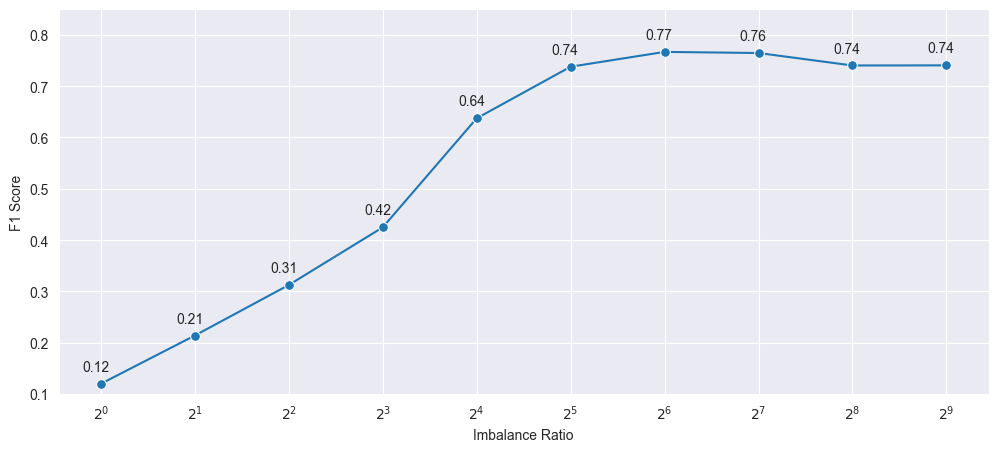

In [7]:
plt.figure(figsize=(12, 5))
plt.grid()
sns.lineplot(x = range(0, 10), y = f1_score_list, marker = 'o', markersize = 7)
plt.xlabel('Imbalance Ratio')
plt.ylabel('F1 Score')
#plt.title('Performance de uma Regressão Logística com diferentes Imbalance Ratio', fontsize = 12)
plt.xticks(range(0, 10), [f'$2^{n}$' for n in range(0, 10)])
plt.ylim(0.1, 0.85)

for i in range(0, 10):
    plt.annotate(f'{f1_score_list[i]:.2f}', (i - 0.2, f1_score_list[i] + 0.025))
plt.show()

In [5]:
np.arange(0.1, 0.9, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])